In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [2]:
df_train = pd.read_csv('E:\\web_economics\\train.csv')
df_val = pd.read_csv('E:\\web_economics\\validation.csv')

## constant bidding -> Fajar

In [3]:
#constant bidding
bid_max = 300

data = pd.DataFrame(columns=['bid','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'bid':[], 'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}
for bid in range(2, bid_max+2, 2):
    budget = 6250000.0
    imps = 0.0
    clicks = 0.0
    spent = 0.0
    for payprice, clicked in df_val[['payprice','click']].values:
        if budget < payprice:
            break
        if bid >= payprice:
            imps = imps + 1
            clicks = clicks + clicked
            budget = budget - payprice
            spent = spent + payprice
    spent = spent / 1000
    ctr = ((clicks / imps) * 100).round(4).astype(str)
    cpm = ((spent / imps) * 1000).round(4).astype(str)
    cpc = (spent / clicks).round(4).astype(str)
    lists['bid'].append(bid)
    lists['clicks'].append(clicks)
    lists['imps'].append(imps)
    lists['spent'].append(spent)
    lists['ctr'].append(ctr)
    lists['cpc'].append(cpc)
    lists['cpm'].append(cpm)
    
data.bid = lists['bid']
data.clicks = lists['clicks']
data.imps = lists['imps']
data.spent = lists['spent']
data.CTR = lists['ctr']
data.CPC = lists['cpc']
data.CPM = lists['cpm']
data

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in double_scalars


,bid,clicks,imps,spent,CTR,CPC,CPM
0,2,0.0,798.0,1.165,0.0,inf,1.4599
1,4,0.0,2133.0,6.421,0.0,inf,3.0103
2,6,8.0,9407.0,44.552,0.085,5.569,4.736
3,8,8.0,12051.0,64.261,0.0664,8.0326,5.3324
4,10,8.0,15966.0,102.098,0.0501,12.7622,6.3947
5,12,9.0,19572.0,143.423,0.046,15.9359,7.328
6,14,10.0,22622.0,184.637,0.0442,18.4637,8.1618
7,16,11.0,26289.0,241.850,0.0418,21.9864,9.1997
8,18,13.0,30733.0,319.572,0.0423,24.5825,10.3983
9,20,15.0,45543.0,614.257,0.0329,40.9505,13.4874


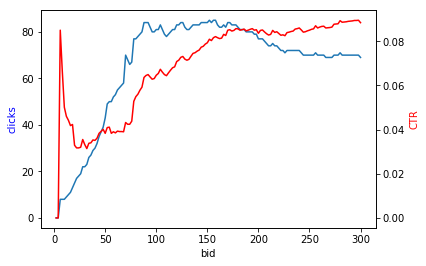

In [4]:
clicks = data[['clicks','bid']]
ctrs = data[['CTR','bid']]
ctrs = ctrs.astype(float)
clicks = clicks.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(clicks['bid'],clicks['clicks'])
ax1.set_xlabel('bid')
ax1.set_ylabel('clicks',color='b')

ax2 = ax1.twinx()
ax2.plot(ctrs['bid'],ctrs['CTR'],color='r')
ax2.set_ylabel('CTR',color='r')
fig.savefig('constant_bid.png')
plt.show()

In [5]:
data.iloc[np.where(data.clicks == data.clicks.max())[0]]

,bid,clicks,imps,spent,CTR,CPC,CPM
75,152,85.0,105115.0,6249.939,0.0809,73.5287,59.4581
77,156,85.0,104178.0,6249.976,0.0816,73.5291,59.9932
78,158,85.0,103565.0,6249.953,0.0821,73.5289,60.3481


## Random bidding -> Fajar

In [6]:
#random bidding
bid_max = 300

data = pd.DataFrame(columns=['upper_bound','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'upper_bound':[], 'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}
for k in range(2, bid_max+2, 2):
    budget = 6250000.0
    imps = 0.0
    clicks = 0.0
    spent = 0.0
    for payprice,clicked in df_val[['payprice','click']].values:
        bid = randint(1, k)
        if budget < payprice:
            break
        if bid >= payprice:
            imps = imps + 1
            clicks = clicks + clicked
            budget = budget - payprice
            spent = spent + payprice
    spent = spent / 1000
    ctr = ((clicks / imps) * 100).round(4).astype(str)
    cpm = ((spent / imps) * 1000).round(4).astype(str)
    cpc = (spent / clicks).round(4).astype(str)
    lists['upper_bound'].append(k)
    lists['clicks'].append(clicks)
    lists['imps'].append(imps)
    lists['spent'].append(spent)
    lists['ctr'].append(ctr)
    lists['cpc'].append(cpc)
    lists['cpm'].append(cpm)    

data.upper_bound = lists['upper_bound']
data.clicks = lists['clicks']
data.imps = lists['imps']
data.spent = lists['spent']
data.CTR = lists['ctr']
data.CPC = lists['cpc']
data.CPM = lists['cpm']
data

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in double_scalars


,upper_bound,clicks,imps,spent,CTR,CPC,CPM
0,2,0.0,570.0,0.709,0.0,inf,1.2439
1,4,0.0,1101.0,2.529,0.0,inf,2.297
2,6,3.0,3508.0,14.450,0.0855,4.8167,4.1192
3,8,4.0,5553.0,26.024,0.072,6.506,4.6865
4,10,4.0,7361.0,38.604,0.0543,9.651,5.2444
5,12,5.0,9203.0,54.163,0.0543,10.8326,5.8854
6,14,6.0,11068.0,71.954,0.0542,11.9923,6.5011
7,16,8.0,12648.0,88.499,0.0633,11.0624,6.9971
8,18,8.0,14734.0,113.898,0.0543,14.2372,7.7303
9,20,4.0,17053.0,150.404,0.0235,37.601,8.8198


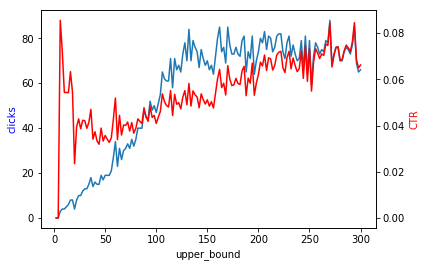

In [10]:
clicks = data[['clicks','upper_bound']]
ctrs = data[['CTR','upper_bound']]
ctrs = ctrs.astype(float)
clicks = clicks.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(clicks['upper_bound'],clicks['clicks'])
ax1.set_xlabel('upper_bound')
ax1.set_ylabel('clicks',color='b')

ax2 = ax1.twinx()
ax2.plot(ctrs['upper_bound'],ctrs['CTR'],color='r')
ax2.set_ylabel('CTR',color='r')
fig.savefig('random_bid.png')
plt.show()

In [8]:
data.iloc[np.where(data.clicks == data.clicks.max())[0]]

,upper_bound,clicks,imps,spent,CTR,CPC,CPM
134,270,88.0,104245.0,6249.828,0.0844,71.0208,59.9533
